# Importing Libraries

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

# Read Image with OPENCV

In [4]:
img = cv2.imread('../test_images/freepressjournal_import_2019_04_448464640.webp')
img.shape

(379, 674, 3)

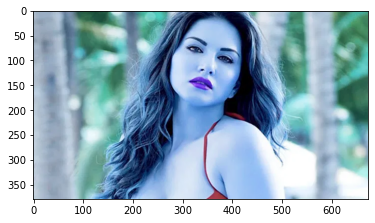

In [5]:
plt.imshow(img)

In [6]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(379, 674)

In [7]:
gray

array([[190, 190, 190, ..., 155, 154, 154],
       [190, 190, 190, ..., 155, 154, 154],
       [190, 190, 190, ..., 156, 150, 150],
       ...,
       [215, 210, 210, ..., 253, 253, 253],
       [215, 210, 210, ..., 252, 253, 253],
       [215, 210, 210, ..., 252, 253, 253]], dtype=uint8)

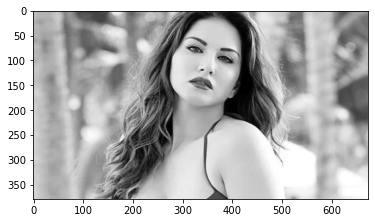

In [8]:
plt.imshow(gray, cmap='gray')

# Detect Face

In [10]:
face_cascade = cv2.CascadeClassifier('../opencv/haarcascade/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('../opencv/haarcascade/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[266,  18, 174, 174]], dtype=int32)

In [11]:
x, y, w, h = faces[0]

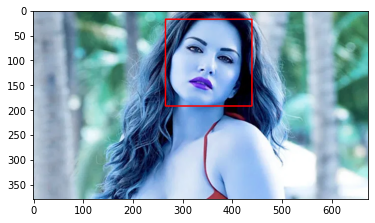

In [12]:
face_img = cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
plt.imshow(face_img)

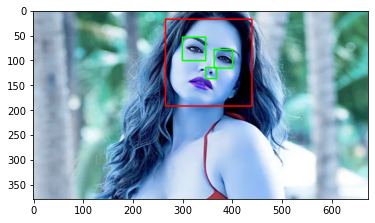

In [13]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img =  cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0,255,0), 2)
    

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

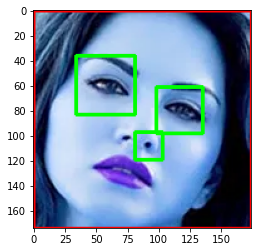

In [14]:
plt.imshow(roi_color, cmap='gray')

In [15]:
def get_cropped_img_if_2eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color


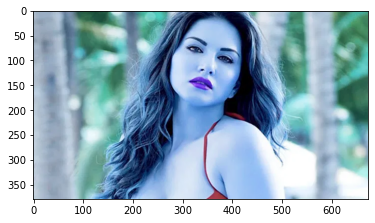

In [16]:
orignal_img = cv2.imread('../test_images/freepressjournal_import_2019_04_448464640.webp')
plt.imshow(orignal_img)

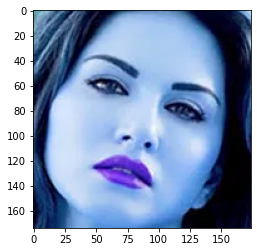

In [18]:
cropped_img = get_cropped_img_if_2eyes('../test_images/freepressjournal_import_2019_04_448464640.webp')
plt.imshow(cropped_img)

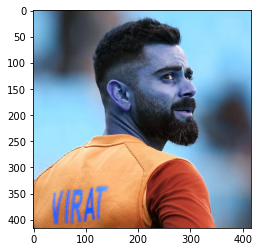

In [19]:
orignal_img = cv2.imread("../test_images/unknown.jpeg")
plt.imshow(orignal_img)

In [20]:
cropped_img = get_cropped_img_if_2eyes("../test_images/unknown.jpeg")
cropped_img

# Cropping faces from image

In [22]:
PATH_TO_DATA = "../dataset/"
PATH_TO_CROP_DATA = "../dataset/cropped/"
import os
img_dirs = []
for entry in os.scandir(PATH_TO_DATA):
    if entry.is_dir():
        img_dirs.append(entry.path)
img_dirs

['../dataset/sachin_tendulkar',
 '../dataset/sunny_leone',
 '../dataset/virat_kohli',
 '../dataset/akshay_kumar',
 '../dataset/honey_singh']

In [23]:
import shutil
if os.path.exists(PATH_TO_CROP_DATA):
    shutil.rmtree(PATH_TO_CROP_DATA)
os.mkdir(PATH_TO_CROP_DATA)

In [24]:
cropped_img_dirs = []
celebrity_name_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    celebrity_name_dict[celebrity_name] = []

    for entry in os.scandir(img_dir):
        roi_color = get_cropped_img_if_2eyes(entry.path)
        if roi_color is not None:
            cropped_folder = PATH_TO_CROP_DATA + celebrity_name
            if not os.path.exists(cropped_folder):
                os.mkdir(cropped_folder)
                cropped_img_dirs.append(cropped_folder)
                print("Generating cropped images in folder :", cropped_folder)
            cropped_file_name = celebrity_name + str(count)+ ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_name_dict[celebrity_name].append(cropped_file_path)
            count += 1



sachin_tendulkar
Generating cropped images in folder : ../dataset/cropped/sachin_tendulkar
sunny_leone
Generating cropped images in folder : ../dataset/cropped/sunny_leone
virat_kohli
Generating cropped images in folder : ../dataset/cropped/virat_kohli
akshay_kumar
Generating cropped images in folder : ../dataset/cropped/akshay_kumar
honey_singh
Generating cropped images in folder : ../dataset/cropped/honey_singh


In [25]:
celebrity_name_dict

{'sachin_tendulkar': ['../dataset/cropped/sachin_tendulkar/sachin_tendulkar1.png',
  '../dataset/cropped/sachin_tendulkar/sachin_tendulkar2.png',
  '../dataset/cropped/sachin_tendulkar/sachin_tendulkar3.png',
  '../dataset/cropped/sachin_tendulkar/sachin_tendulkar4.png',
  '../dataset/cropped/sachin_tendulkar/sachin_tendulkar5.png',
  '../dataset/cropped/sachin_tendulkar/sachin_tendulkar6.png',
  '../dataset/cropped/sachin_tendulkar/sachin_tendulkar7.png',
  '../dataset/cropped/sachin_tendulkar/sachin_tendulkar8.png',
  '../dataset/cropped/sachin_tendulkar/sachin_tendulkar9.png',
  '../dataset/cropped/sachin_tendulkar/sachin_tendulkar10.png',
  '../dataset/cropped/sachin_tendulkar/sachin_tendulkar11.png',
  '../dataset/cropped/sachin_tendulkar/sachin_tendulkar12.png',
  '../dataset/cropped/sachin_tendulkar/sachin_tendulkar13.png',
  '../dataset/cropped/sachin_tendulkar/sachin_tendulkar14.png',
  '../dataset/cropped/sachin_tendulkar/sachin_tendulkar15.png',
  '../dataset/cropped/sachin_

# Wavelate Transformation

In [26]:
import pywt
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

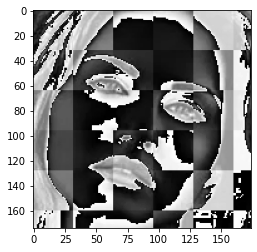

In [27]:
cropped_img = get_cropped_img_if_2eyes('../test_images/freepressjournal_import_2019_04_448464640.webp')
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [28]:
class_dict = {}
count = 0
for celebrity_name in celebrity_name_dict:
    class_dict[celebrity_name] = count
    count += 1
class_dict

{'sachin_tendulkar': 0,
 'sunny_leone': 1,
 'virat_kohli': 2,
 'akshay_kumar': 3,
 'honey_singh': 4}

In [29]:
X = []
y = []
for celebrity_name, training_files in celebrity_name_dict.items():
    for training_img in training_files:
        img = cv2.imread(training_img)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32,32))
        img_har = w2d(img, 'db1', 5)
        scalled_img_har = cv2.resize(img_har, (32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3, 1), scalled_img_har.reshape(32*32, 1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])


In [30]:
len(X)

157

In [31]:
X[0]

array([[ 29],
       [ 17],
       [ 17],
       ...,
       [ 13],
       [198],
       [ 29]], dtype=uint8)

In [32]:
X = np.array(X).reshape(len(X), 4096).astype(float)
X.shape

(157, 4096)

In [33]:
X[0]

array([ 29.,  17.,  17., ...,  13., 198.,  29.])

# Train Our Model

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    random_state=0
)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf', C=10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)


0.675

In [35]:
len(X_test)

40

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pipe.predict(X_test)))

precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.71      0.83      0.77        12
           2       0.67      0.80      0.73         5
           3       0.86      0.50      0.63        12
           4       0.33      0.50      0.40         4

    accuracy                           0.68        40
   macro avg       0.66      0.67      0.65        40
weighted avg       0.71      0.68      0.68        40



In [37]:
cm = confusion_matrix(y_test, pipe.predict(X_test))
cm

array([[ 5,  1,  1,  0,  0],
       [ 1, 10,  0,  0,  1],
       [ 0,  0,  4,  0,  1],
       [ 0,  3,  1,  6,  2],
       [ 1,  0,  0,  1,  2]])

Text(33.0, 0.5, 'Truth')

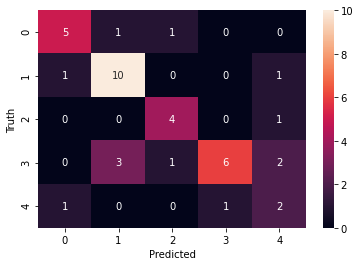

In [38]:
import seaborn as sns
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Grid Search

In [39]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [40]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [41]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
pd.DataFrame(scores,columns=['model','best_score','best_params'])

,model,best_score,best_params
0,svm,0.741667,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.606159,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.734058,{'logisticregression__C': 10}


In [42]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=10, solver='liblinear'))])}

In [43]:
best_estimators['svm'].score(X_test, y_test)

0.825

In [44]:
best_estimators['logistic_regression'].score(X_test, y_test)

0.85

In [45]:
best_clf = best_estimators['svm']

# Save the Model

In [46]:
!pip install joblib
import joblib
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [47]:
# saving class dictionary
import json
with open('class_dictioary.json', 'w') as f:
    f.write(json.dumps(class_dict))